In [21]:
# import libraries
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt 

#NEW!
from sklearn.model_selection import train_test_split 

In [22]:
# import dataset (comses with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

#convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values).float()

#transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
#labels[iris.species=='setosa'] = 0 #Not needed
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

## Brief on using train_test_split

In [23]:
#Creating fake dataset

fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T 
fakelabels = np.arange(10)>4 
print(fakedata), print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [24]:
# use scikitlearn to split the data
train_data,test_data,train_labels,test_labels = \
    train_test_split(fakedata,fakelabels, test_size=.2)

# Note the third input parameter above.
# This can be specified as test size or training size.
# Be mindful of which parameter is written!

#print out the sizes
print('Training data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))
print(' ')

# print out the train/test data
print('Training data: ')
print(train_data)
print(' ')

print('Test data: ')
print(test_data)

Training data size: (8, 4)
Test data size: (2, 4)
 
Training data: 
[[ 61  62  63  64]
 [ 11  12  13  14]
 [ 21  22  23  24]
 [ 51  52  53  54]
 [ 81  82  83  84]
 [101 102 103 104]
 [ 91  92  93  94]
 [ 71  72  73  74]]
 
Test data: 
[[31 32 33 34]
 [41 42 43 44]]


## Back to the model

In [25]:
# Function that creates the ANN model

def createANewModel():
    #model architecture
    ANNiris = nn.Sequential(
    nn.Linear(4,64), #input layer
    nn.ReLU(), #activation unit
    nn.Linear(64,64), #hidden layer
    nn.ReLU(), #activation unit
    nn.Linear(64,3), #output units
)

    #loss function
    lossfun = nn.CrossEntropyLoss()

    #optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.01)

    return ANNiris, lossfun, optimizer


In [26]:
# train the model

#global parameter
numepochs = 200

def trainTheModel(trainProp):

    #initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []
    X_train, X_test, y_train, y_test = train_test_split(data,labels, train_size=trainProp)

    #loop over epochs
    for epoch_idx in range(numepochs):

        #Separate train from test data
        #Note 1: unique split for each epoch
        #Note 2: Here we specify the training size, not the testing size!

        #forward pass and loss
        yHat = ANNiris(X_train)
        loss = lossfun(yHat, y_train)

        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #compute training accuracy
        trainAcc.append( 100*torch.mean((torch.argmax(yHat, axis=1) == y_train).float()).item())

        # test accuracy
        predlabels = torch.argmax( ANNiris(X_test), axis=1 )
        testAcc.append( 100*torch.mean((predlabels == y_test).float()).item())
    
    #function output
    return trainAcc, testAcc

## Test the model by running it once

In [27]:
# create a model
ANNiris, lossfun, optimizer = createANewModel()

#train the model
#Note: the input is the training proportion, not the test proportion!
trainAcc, testAcc = trainTheModel(.8)

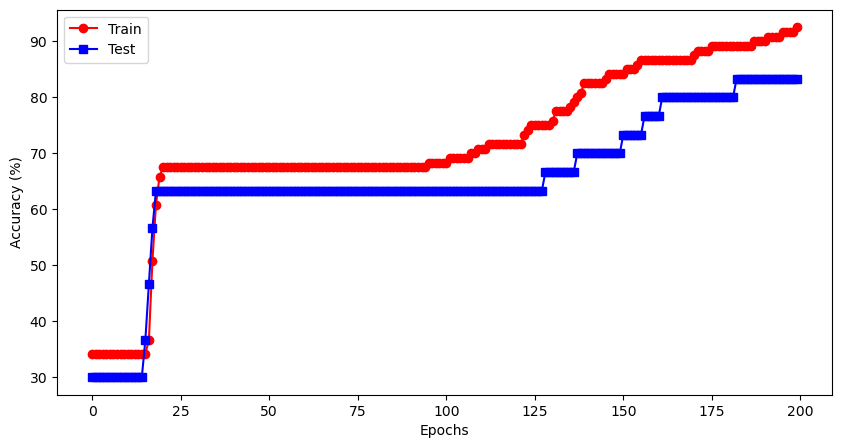

In [28]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train', 'Test'])
plt.show()

## Experiment

In [29]:
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes),numepochs))

for i in range(len(trainSetSizes)):

    #create a model
    ANNiris, lossfun, optimizer = createANewModel()

    #train the model
    trainAcc, testAcc = trainTheModel(trainSetSizes[i])

    #store the results
    allTrainAcc[i,:] = trainAcc
    allTestAcc[i,:] = testAcc

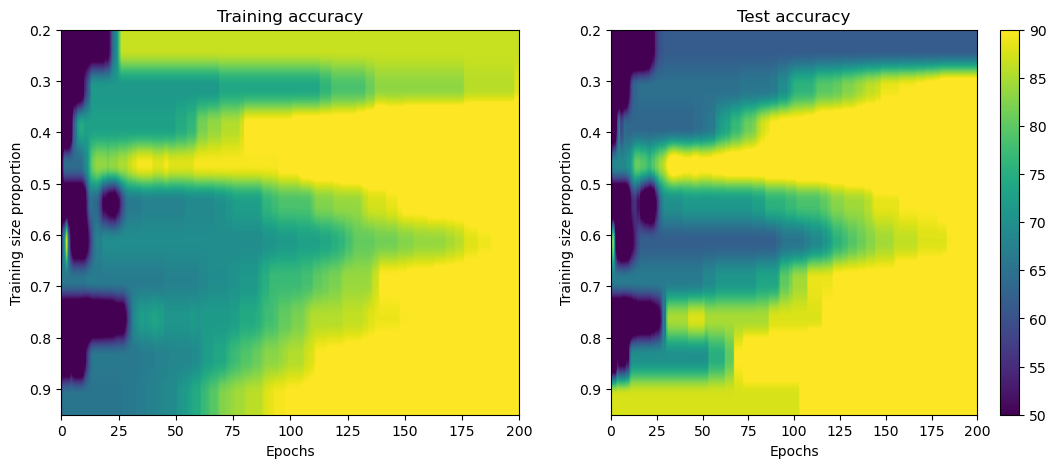

In [30]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()
     